<h1><center>Proyecto de Titulación</center></h1>

<h2><center>Segmentación de Municipios de la República Mexicana</center></h2>
<center>Pablo Gómez García</center>
 

# Objetivo

Plantear una solución desde un enfoque Analítico basada en un Modelo no supervisado que logre segmentar a los municipios de la República Mexicana. Se pretende que dicha segmentación resulte de utilidad para estrategias de implementación de Políticas Públicas, de Marketing y para estrategias de Seguridad Pública.

<font color='black'><h2>Introducción</h2></font>
<p style='text-align: justify;'>
En la actualidad existen en México diversos estudios a nivel municipio, en su mayoría muestran características poblacionales de cada uno de ellos, también muestran estados de opinión, preferencias electorales, índices de Pobreza y Marginación etc.

Toda la información que se tiene acerca de los municipios es valiosa para distintos fines, sin embargo a la fecha hay muy pocos estudios que describen a los municipios por medio de varias de sus características, si es que existe tales estudios lo hacen a nivel descriptivo simple.

Dentro de este proyecto planteamos la posibilidad de aplicar una técnica no supervisada para encontrar una segmentación muy característica de los municipios del País.


<p style='text-align: justify;'>

<font color='black'><h2>Planteamiento del Problema</h2></font>
<p style='text-align: justify;'>
Tomando como punto de partida la información pública que existe de los municipios en diversos temas, plateamos la siguiente Hipótesis:
</p>

“Existen variables entre los datos públicos de los municipios que permiten diferenciarlos en segmentos cuyos elementos que los conforman poseen características homogéneas entre sí pero heterogéneas con los elementos de otros segmentos”.
Bajo el supuesto anterior se propone recaudar información pública de fuentes como el INEGI, la PGR, la CNBV entre otras más. Con esta información se procedería a construir un Modelo no supervisado para encontrar los segmentos planteados en la hipótesis. Cabe mencionar que este Modelo no tendrá como objetivo clasificar municipios que sean creados en el futuro pues esto no sucede a menudo, sin embargo busca mostrar de manera descriptiva el valor y aporte de cada segmento para los fines planteados en el objetivo del proyecto.



<p style='text-align: justify;'>

<h3><font color='black'><span style='background :white' >** Importar librerías **</span></font></h3>

In [1]:
#Importamos los paquetes que vamos a utilizar
import json as js
import random as rd
import math as mt
from time import time
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import unicodedata
import re
from collections import Counter
import numpy as np
import io
import seaborn as sns

<h3><font color='black'><span style='background :white' >** Importar el conjunto de datos **</span></font></h3>

Fuente:



https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva




https://drive.google.com/file/d/1caLtpjb1KahDK3dTTBOEwR2syA3FySrD/view?usp=sharing



In [8]:
#Cargamos los datos originales
import csv
with open('IDM_NM_sep22.csv', newline='', encoding='utf-8', errors='ignore') as csvfile:
    csv_reader = list(csv.reader(csvfile, delimiter=','))
#print(csv_reader)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
df_natural=pd.DataFrame(csv_reader[1:],columns=csv_reader[0])
df_natural

,Anio,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_juridico_afectado,Tipo_delito,Subtipo_delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832399,2022,32,Zacatecas,32058,Santa Mara de la Paz,Otros bienes jurdicos afectados (del fuero comn),Falsificacin,Falsificacin,Falsificacin,0,...,0,0,0,0,0,0,0,,,
1832400,2022,32,Zacatecas,32058,Santa Mara de la Paz,Otros bienes jurdicos afectados (del fuero comn),Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0,0,0,0,0,,,
1832401,2022,32,Zacatecas,32058,Santa Mara de la Paz,Otros bienes jurdicos afectados (del fuero comn),Delitos cometidos por servidores pblicos,Delitos cometidos por servidores pblicos,Delitos cometidos por servidores pblicos,0,...,0,0,0,0,0,0,0,,,
1832402,2022,32,Zacatecas,32058,Santa Mara de la Paz,Otros bienes jurdicos afectados (del fuero comn),Electorales,Electorales,Electorales,0,...,0,0,0,0,0,0,0,,,


In [51]:
#Cargamos los datos que previamente fueron Manipulados con el software R para obtner la siguiente tabla
# Se importa  el archivo con los nombres de municipios y Estados
df_ini=pd.read_csv('Delitos_totales_2022_final.csv')
df = df_ini.set_index('id')
drop_col=['Entidad','Municipio','XCOORD','YCOORD']
df.drop(drop_col, inplace=True, axis=1)
df

,Aborto,Abuso_de_confianza,Abuso_sexual,Acoso_sexual,Allanamiento_de_morada,Amenazas,Contra_el_medio_ambiente,Corrupcion_de_menores,Dano_a_la_propiedad,por_servidores_publicos,...,vida_integridad_corporal,Rapto,Robo,Secuestro,Trafico_de_menores,Trata_de_personas,Violacion_equiparada,Violacion_simple,Violencia_de_genero,Violencia_familiar
id,,,,,,,,,,,,,,,,,,,,,
1010001,0.000000,0.291667,0.177083,0.031250,0.010417,0.479167,0.000000,0.000000,1.458333,0.000000,...,0.052083,0.000000,0.138600,0.000000,0.000000,0.000000,0.020833,0.250000,0.000000,0.729167
1010002,0.000000,0.000000,0.010417,0.000000,0.000000,0.062500,0.000000,0.000000,0.010417,0.000000,...,0.010417,0.000000,0.003472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010417
1010003,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.052083,0.000000,...,0.000000,0.000000,0.001157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1010004,0.000000,0.468750,0.333333,0.041667,0.062500,0.947917,0.000000,0.000000,2.583333,0.000000,...,0.010417,0.000000,0.152488,0.004167,0.000000,0.000000,0.000000,0.260417,0.000000,1.125000
1010005,0.125000,34.020833,17.354167,1.895833,8.583333,66.093750,0.041667,0.989583,129.364583,7.927083,...,2.072917,0.000000,12.393808,0.014583,0.000000,0.052083,0.520833,9.958333,0.135417,269.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99014,0.281250,34.770833,10.406250,3.895833,4.781250,61.072917,3.989583,0.760417,69.479167,13.718750,...,2.229167,0.031250,19.239873,0.106250,0.010417,0.583333,1.364583,2.697917,0.000000,72.437500
99015,0.552083,66.395833,34.760417,11.427083,6.125000,131.354167,6.343750,2.583333,104.729167,104.364583,...,8.385417,0.041667,31.223090,0.183333,0.031250,3.260417,4.322917,8.729167,0.000000,157.281250
99016,0.364583,22.166667,12.062500,4.020833,3.500000,52.333333,3.312500,0.739583,56.489583,14.510417,...,1.291667,0.031250,15.146991,0.085417,0.000000,0.375000,1.635417,2.979167,0.000000,70.156250


<h3><font color='black'><span style='background :white' >** Análisis exploratorio de datos **</span></font></h3>

In [17]:
# Visualizamos las columnas que contiene el dataset
df.columns

Index(['Aborto', 'Abuso_de_confianza', 'Abuso_sexual', 'Acoso_sexual',
       'Allanamiento_de_morada', 'Amenazas', 'Contra_el_medio_ambiente',
       'Corrupcion_de_menores', 'Dano_a_la_propiedad',
       'por_servidores_publicos', 'Despojo', 'Electorales',
       'Evasion_de_presos', 'Extorsion', 'Falsedad', 'Falsificacion',
       'Feminicidio', 'Fraude', 'Homicidio', 'Hostigamiento_sexual', 'Incesto',
       'Incump_obligaciones_asistencia_fam', 'Lesiones', 'Narcomenudeo',
       'contra_el_patrimonio', 'Otros_contra_la_familia',
       'Otros_contra_la_sociedad', 'Otros_Fuero_Comun', 'libertad_personal',
       'libertad_seguridad_sexual', 'vida_integridad_corporal', 'Rapto',
       'Robo', 'Secuestro', 'Trafico_de_menores', 'Trata_de_personas',
       'Violacion_equiparada', 'Violacion_simple', 'Violencia_de_genero',
       'Violencia_familiar'],
      dtype='object')

In [18]:
df.dtypes

Aborto                                float64
Abuso_de_confianza                    float64
Abuso_sexual                          float64
Acoso_sexual                          float64
Allanamiento_de_morada                float64
Amenazas                              float64
Contra_el_medio_ambiente              float64
Corrupcion_de_menores                 float64
Dano_a_la_propiedad                   float64
por_servidores_publicos               float64
Despojo                               float64
Electorales                           float64
Evasion_de_presos                     float64
Extorsion                             float64
Falsedad                              float64
Falsificacion                         float64
Feminicidio                           float64
Fraude                                float64
Homicidio                             float64
Hostigamiento_sexual                  float64
Incesto                               float64
Incump_obligaciones_asistencia_fam

In [19]:
#Visualizamos los Estadigrafos de la variables
df_describe=df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
Aborto,2479.0,0.020641,0.103366,0.0,0.00,0.00,0.010,1.97
Abuso_de_confianza,2479.0,0.824712,3.707413,0.0,0.00,0.04,0.240,66.40
Abuso_sexual,2479.0,0.676958,2.973642,0.0,0.01,0.05,0.220,50.75
Acoso_sexual,2479.0,0.134433,0.677515,0.0,0.00,0.00,0.030,15.64
Allanamiento_de_morada,2479.0,0.434885,3.573997,0.0,0.00,0.03,0.150,154.16
Amenazas,2479.0,3.179000,14.026048,0.0,0.04,0.21,0.930,217.26
Contra_el_medio_ambiente,2479.0,0.060803,0.398351,0.0,0.00,0.00,0.010,9.18
Corrupcion_de_menores,2479.0,0.071154,0.512703,0.0,0.00,0.00,0.020,16.99
Dano_a_la_propiedad,2479.0,4.244078,18.110651,0.0,0.06,0.29,1.445,308.27
por_servidores_publicos,2479.0,0.588495,3.766842,0.0,0.01,0.04,0.130,104.36


In [20]:
# Obtenemos el % total de valores perdidos que aún quedan en la base
df.isnull().values.mean() * 100

0.0

In [21]:
df.shape

(2479, 40)

<h3><font color='black'><span style='background :white' >Approach 1</span></font></h3>

<AxesSubplot:>

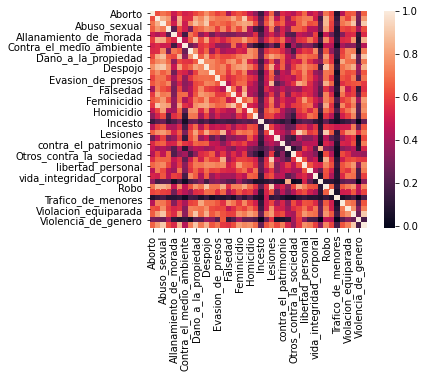

In [23]:
# Análisis de correlación entre las variables
sns.heatmap(df.corr(method='pearson'),square=True)

<h4><font color='black'><span style='background :white' >Clustering de variables</span></font></h4>

In [ ]:
#!pip install varclushi

In [25]:
#Clusterin de variables
from varclushi import VarClusHi
#Realizamos el clustering
var_clust_model=VarClusHi(df,maxeigval2=0.7, maxclus=None)
var_clust_model.varclus()

In [26]:
#Visualizamos los clusters formados
var_clust_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Abuso_de_confianza,0.830808,0.769288,0.733349
1,0,por_servidores_publicos,0.824154,0.621512,0.464602
2,0,Falsedad,0.760237,0.409843,0.406269
3,0,Falsificacion,0.822116,0.567534,0.411324
4,0,Fraude,0.909022,0.681342,0.285505
5,0,Trata_de_personas,0.770087,0.522953,0.481950
6,1,Abuso_sexual,0.872288,0.757028,0.525624
7,1,Amenazas,0.838310,0.567483,0.373835
8,1,Dano_a_la_propiedad,0.895934,0.750435,0.416989
9,1,contra_el_patrimonio,0.586850,0.414141,0.705204


In [27]:
#Verificamos el proceso anterior
var_clus=var_clust_model.rsquare
var_clus.to_csv('var_clust.csv')

# Observación
Tras el Análisis de Clustering de variables podemos tomar la variable con la distancia menor al centroide dentro de cada cluster, esto es con el valor del RS_Ratio y así elegiriamos una variable representante de cada grupo de acuerdo a su nivel de correlación. Por otro lado aquellos cluster cuyo numero de variables es uno significa que son variables que no se correlaconan con ninguna otra.

El criterio tomado es que la iteración del algoritmo pare cuando se tenga el 70% de la Varianza explicada.

En este caso de 40 variables que entraron al análisis podemos xplicar el 70% de la varianza del fenómeno con solo con solo 11 variables.

In [53]:
#Eliminamos la variables correlacionada de nuestro Data set original
col_drop2 = ['Falsedad','Falsificacion','por_servidores_publicos','Trata_de_personas','Abuso_de_confianza','Amenazas',
            'Dano_a_la_propiedad','Violacion_simple','Abuso_sexual','contra_el_patrimonio','libertad_seguridad_sexual',
            'Otros_contra_la_familia','Aborto','Feminicidio','Secuestro','Evasion_de_presos','Despojo','Lesiones',
            'Extorsion','Robo','Violencia_de_genero','Narcomenudeo','Incump_obligaciones_asistencia_fam',
             'vida_integridad_corporal','Allanamiento_de_morada','Hostigamiento_sexual','Violacion_equiparada',
             'Acoso_sexual','Electorales'] 
df.drop(col_drop2, inplace=True, axis=1)

In [29]:
df

,Contra_el_medio_ambiente,Corrupcion_de_menores,Fraude,Homicidio,Incesto,Otros_contra_la_sociedad,Otros_Fuero_Comun,libertad_personal,Rapto,Trafico_de_menores,Violencia_familiar
id,,,,,,,,,,,
1010001,0.00,0.00,1.32,0.08,0.00,0.00,2.35,0.06,0.00,0.00,0.73
1010002,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.00,0.00,0.00,0.01
1010003,0.00,0.00,0.00,0.01,0.00,0.00,0.06,0.00,0.00,0.00,0.00
1010004,0.00,0.00,0.74,0.10,0.00,0.02,1.83,0.11,0.00,0.00,1.13
1010005,0.04,0.99,104.42,0.87,0.01,1.74,34.98,11.83,0.00,0.00,269.06
...,...,...,...,...,...,...,...,...,...,...,...
99014,3.99,0.76,154.69,0.53,0.00,5.32,58.61,5.84,0.03,0.01,72.44
99015,6.34,2.58,294.99,1.43,0.00,18.76,122.91,14.18,0.04,0.03,157.28
99016,3.31,0.74,114.60,0.67,0.00,5.34,45.83,6.30,0.03,0.00,70.16


<h2><font color='black'><span style='background :white' >** Modelación **</span></font></h2>

En esta parte vamos a probar un modelo simple de kmeans para tener un primer acercamiento de si los datos propuestos arrojan resultados orientados a probar nuestra hipótesis. 

<h2><font color='black'><span style='background :white' >** Análisis de Clustering: K-Means **</span></font></h2>

In [56]:
# Realizamos un proceso de estandarización de las variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [32]:
# cluster es la clase para implementar agrupamiento con sklearn.
from sklearn import cluster

## Método del codo

In [57]:
# Ejecución de K-means con 12 valores de clusters.
distorsion = []
for i in range(1,13):
  modeloK = cluster.KMeans(n_clusters = i)
  modeloK.fit(X)
  distorsion.append(modeloK.inertia_)

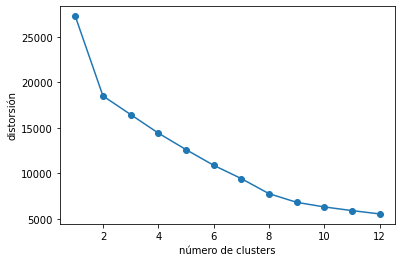

In [58]:
# Grafica de distorsión para identificar el codo de la curva con el que se
# obtiene el número óptimo de clusters.
clusters = np.linspace(1,12,12)
plt.plot(clusters, distorsion, marker = 'o')
plt.xlabel('número de clusters')
plt.ylabel('distorsión')
plt.show()

In [59]:
# Construcción del modelo para obtener etiquetas mediante kmeans.
# Debemos indicar el numero de clusters (grupos) que el algorítmo ajustará.
modeloK = cluster.KMeans(n_clusters = 7)

In [60]:
# Ajuste de los clusters.
modeloK.fit(X)

KMeans(n_clusters=7)

In [63]:
prediccion = modeloK.predict(X)
tabla={'id':df_ini['id'],
    'cluster':prediccion}
clusters=pd.DataFrame(tabla)
#Cruzamos los data frames de frecuencias de bigramas y de unigramas
df_final=pd.merge(df_ini,clusters, left_on='id', right_on='id')
df_final

,id,Entidad,Municipio,Aborto,Abuso_de_confianza,Abuso_sexual,Acoso_sexual,Allanamiento_de_morada,Amenazas,Contra_el_medio_ambiente,...,Secuestro,Trafico_de_menores,Trata_de_personas,Violacion_equiparada,Violacion_simple,Violencia_de_genero,Violencia_familiar,XCOORD,YCOORD,cluster
0,1010001,Durango,Canatlan,0.000000,0.291667,0.177083,0.031250,0.010417,0.479167,0.000000,...,0.000000,0.000000,0.000000,0.020833,0.250000,0.000000,0.729167,-104.935940,24.511204,1
1,1010002,Durango,Canelas,0.000000,0.000000,0.010417,0.000000,0.000000,0.062500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010417,-106.451115,25.072775,1
2,1010003,Durango,Coneto de Comonfort,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-104.783619,25.033937,1
3,1010004,Durango,Cuencame,0.000000,0.468750,0.333333,0.041667,0.062500,0.947917,0.000000,...,0.004167,0.000000,0.000000,0.000000,0.260417,0.000000,1.125000,-103.700447,24.694192,1
4,1010005,Durango,Durango,0.125000,34.020833,17.354167,1.895833,8.583333,66.093750,0.041667,...,0.014583,0.000000,0.052083,0.520833,9.958333,0.135417,269.062500,-104.843844,23.970456,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,99014,Ciudad de Mexico,Benito Juarez,0.281250,34.770833,10.406250,3.895833,4.781250,61.072917,3.989583,...,0.106250,0.010417,0.583333,1.364583,2.697917,0.000000,72.437500,-99.161135,19.380642,3
2475,99015,Ciudad de Mexico,Cuauhtemoc,0.552083,66.395833,34.760417,11.427083,6.125000,131.354167,6.343750,...,0.183333,0.031250,3.260417,4.322917,8.729167,0.000000,157.281250,-99.149057,19.431371,3
2476,99016,Ciudad de Mexico,Miguel Hidalgo,0.364583,22.166667,12.062500,4.020833,3.500000,52.333333,3.312500,...,0.085417,0.000000,0.375000,1.635417,2.979167,0.000000,70.156250,-99.204570,19.428060,3
2477,99017,Ciudad de Mexico,Venustiano Carranza,0.854167,19.531250,14.541667,3.239583,3.187500,63.093750,2.291667,...,0.097917,0.010417,0.322917,1.510417,3.468750,0.000000,108.500000,-99.093106,19.430496,0


## Resultados del Análisis

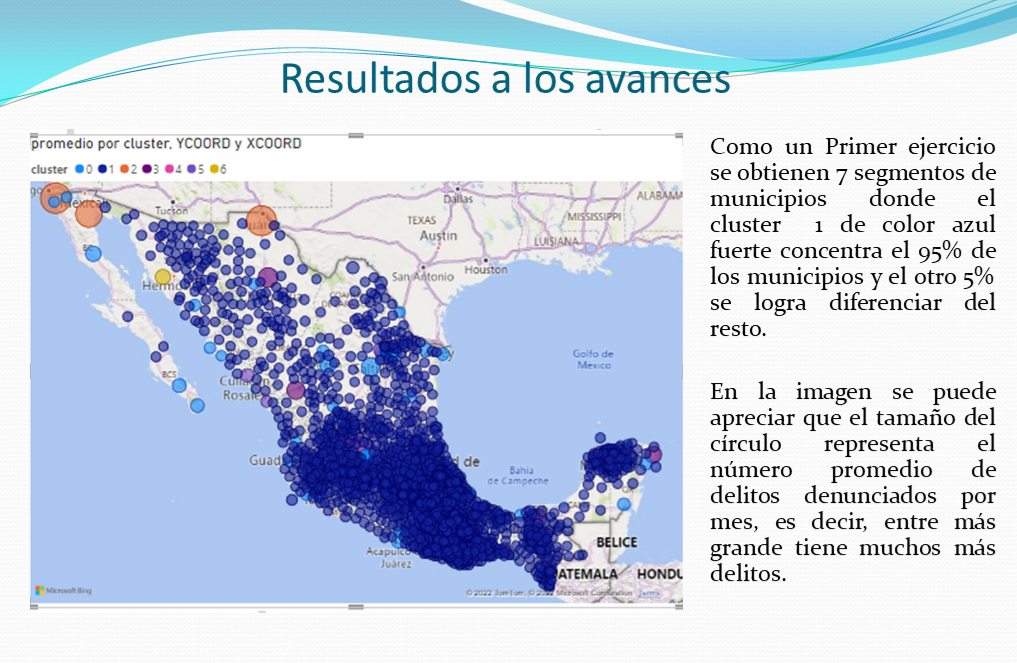

In [6]:
from IPython.display import Image
Image(filename = "resultados.png", width=600, height=5)

In [64]:
df_final.to_csv('clusters.csv')

## Conclusiones

Como primer acercamiento a los resultados buscados  de nuestro proyecto, concluimos lo siguiente:

1. 7 segmentos no son suficientes para discriminar la totalidad de los municipios
2. Se logra diferenciar el 5% de los municipios del resto como aquellos con mayo incidencia delictiva en fraudes, secuestros, trata de personas y homicidios.
3. Es necesario incorporar más variables que ayuden a discriminar mejor a los municipios.
4. Detectamos un sesgo en cuanto a la cultura de la denuncia, es decir municipios  que se perciben con altos índices de delitos (por ejemplo los mencionados constantemente en las noticias azotados por el narcotráfico) no reflejan dicha característica en los datos oficiales.

## Referencias 

1. Mitchell, Tom, “Machine Learning”, Ed. McGraw-Hill (1997), cap 6 pp 154-199.
2. Everitt, B.S. (2011). Cluster analysis, 5th Edition. Wiley.
3. Peña Sánchez de Rivera, D. “Estadística. Modelos y Métodos. Volumen 2” Ed. Alianza. Madrid, 1987
4. Introduction to machine learning, Third Edition. Ethem Alpaydin. MIT Press
5. Understanding Machine Learning: From Theory to Algorithms. Shai Shalev-Shwartz and Shai Ben-David. Cambridge University Press.